<a href="https://colab.research.google.com/github/yohanesnuwara/ccs-gundih/blob/master/main/gundih_historical_production_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!git clone https://github.com/yohanesnuwara/ccs-gundih

Cloning into 'ccs-gundih'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 259 (delta 55), reused 0 (delta 0), pack-reused 165
Receiving objects: 100% (259/259), 14.37 MiB | 26.09 MiB/s, done.
Resolving deltas: 100% (136/136), done.


# Visualize the Historical Production Data

In [0]:
# Read simulation result

col = np.array(['Date', 'Days', 'WSAT', 'OSAT', 'GSAT', 'GMT', 'OMR', 'GMR', 'GCDI', 'GCDM', 'WCD',
              'WGR', 'WCT', 'VPR', 'VPT', 'VIR', 'VIT', 'WPR', 'OPR', 'GPR', 'WPT', 'OPT', 'GPT',
              'PR', 'GIR', 'GIT', 'GOR'])

case1 = pd.read_excel(r'/content/ccs-gundih/data/CASE_1.xlsx'); case1 = pd.DataFrame(case1, columns=col) #INJ-2, 15 MMSCFD, kv/kh = 0.1
case2 = pd.read_excel(r'/content/ccs-gundih/data/CASE_2.xlsx'); case2 = pd.DataFrame(case2, columns=col) #INJ-2, 15 MMSCFD, kv/kh = 0.5

In [0]:
case1.head(5)

,Date,Days,WSAT,OSAT,GSAT,GMT,OMR,GMR,GCDI,GCDM,WCD,WGR,WCT,VPR,VPT,VIR,VIT,WPR,OPR,GPR,WPT,OPT,GPT,PR,GIR,GIT,GOR
0,2014-05-08,0,0.860583,0.138924,0.000492,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.1314,0.0,0.0,0.0
1,2014-05-09,1,0.860583,0.138924,0.000492,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.1314,0.0,0.0,0.0
2,2014-05-10,2,0.860583,0.138924,0.000492,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.1314,0.0,0.0,0.0
3,2014-05-11,3,0.860583,0.138924,0.000492,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.1315,0.0,0.0,0.0
4,2014-05-12,4,0.860583,0.138924,0.000492,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.1315,0.0,0.0,0.0


In [0]:
case2.head(5)

,Date,Days,WSAT,OSAT,GSAT,GMT,OMR,GMR,GCDI,GCDM,WCD,WGR,WCT,VPR,VPT,VIR,VIT,WPR,OPR,GPR,WPT,OPT,GPT,PR,GIR,GIT,GOR
0,2014-05-08,0,0.860583,0.138924,0.000492,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.1314,0.0,0.0,0.0
1,2014-05-09,1,0.860583,0.138924,0.000492,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.1314,0.0,0.0,0.0
2,2014-05-10,2,0.860583,0.138924,0.000492,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.1315,0.0,0.0,0.0
3,2014-05-11,3,0.860583,0.138924,0.000492,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.1316,0.0,0.0,0.0
4,2014-05-12,4,0.860583,0.138924,0.000492,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.1316,0.0,0.0,0.0


In [0]:
# convert to Panda datetime
date = pd.to_datetime(case1['Date'])

# gas production cumulative 
GPT1 = case1['GPT'] * 35.31 * 1E-06  # convert from m3 to ft3 then to mmscf
GPT2 = case2['GPT'] * 35.31 * 1E-06

# gas production rate
GPR1 = case1['GPR'] * 35.31 * 1E-06
GPR2 = case2['GPR'] * 35.31 * 1E-06

# average pressure
PR1 = case1['PR'] * 14.5038 # convert from bar to psi
PR2 = case2['PR'] * 14.5038 

(735234.0, 737060.0)

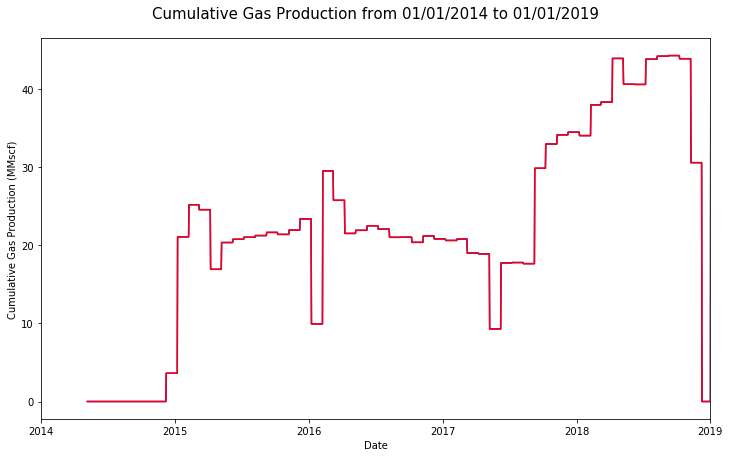

In [0]:
# plot gas production and pressure data from 2014-01-01 to 2016-01-01

pd.plotting.register_matplotlib_converters()

plt.figure(figsize=(12, 7))
plt.plot(date, GPR1, color='blue')
plt.plot(date, GPR2, color='red')
plt.xlabel("Date"); plt.ylabel("Cumulative Gas Production (MMscf)")
plt.title("Cumulative Gas Production from 01/01/2014 to 01/01/2019", pad=20, size=15)
plt.xlim('2014-01-01', '2019-01-01')
# plt.ylim(0, 50000)

<Figure size 432x288 with 0 Axes>

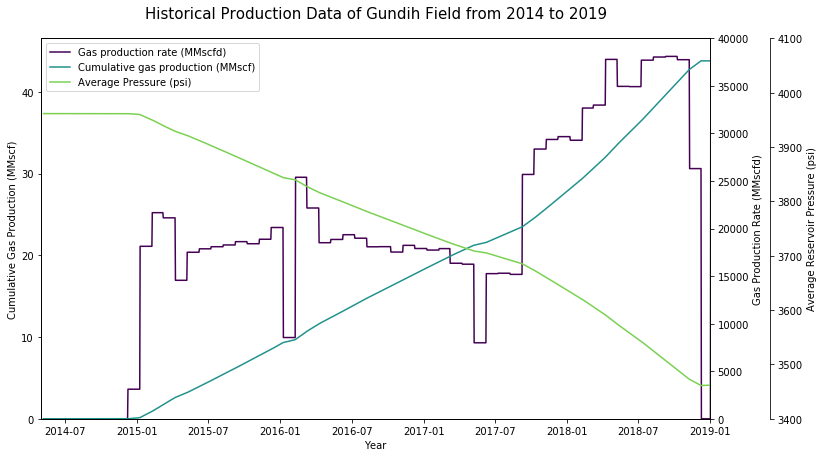

In [0]:
# plot gas production and pressure data from 2014-01-01 to 2016-01-01

pd.plotting.register_matplotlib_converters()

fig = plt.figure()
fig = plt.figure(figsize=(12,7))
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Year")
host.set_ylabel("Cumulative Gas Production (MMscf)")
par1.set_ylabel("Gas Production Rate (MMscfd)")
par2.set_ylabel("Average Reservoir Pressure (psi)")

host.set_title("Historical Production Data of Gundih Field from 2014 to 2019", pad=20, size=15)

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(.5)
color3 = plt.cm.viridis(.8)

p1, = host.plot(date, GPR1, color=color1,label="Gas production rate (MMscfd)")
p2, = par1.plot(date, GPT1, color=color2, label="Cumulative gas production (MMscf)")
p3, = par2.plot(date, PR1, color=color3, label="Average Pressure (psi)")
host.set_xlim('2014-05-01', '2019-01-01')
host.set_ylim(ymin=0)
par1.set_ylim(0, 40000)
par2.set_ylim(3400, 4100)

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))  

plt.savefig('/content/ccs-gundih/result/production_curve')

# Dry-Gas Reservoir Analysis

In [0]:
!git clone https://github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 941 (delta 15), reused 0 (delta 0), pack-reused 909
Receiving objects: 100% (941/941), 12.23 MiB | 45.56 MiB/s, done.
Resolving deltas: 100% (410/410), done.


In [0]:
# calculate gas z factor and FVF

import os, sys
sys.path.append('/content/reservoir-engineering/Unit 2 Review of Rock and Fluid Properties/functions')

from pseudoprops import pseudoprops
from dranchuk_aboukassem import dranchuk
from gasfvf import gasfvf

temp_f = (temp * 9/5) + 32 # Rankine
pressure = np.array(PR1)

z_arr = []
Bg_arr = []
for i in range(len(pressure)):
  P_pr, T_pr = pseudoprops(temp_f, pressure[i], 0.8, 0.00467, 0.23)
  rho_pr, z = dranchuk(T_pr, P_pr)
  temp_r = temp_f + 459.67 
  Bg = 0.0282793 * z * temp_r / pressure[i] # Eq 2.2, temp in Rankine, p in psia
  z_arr.append(float(z))
  Bg_arr.append(float(Bg))

(0, 452765.0949285876)

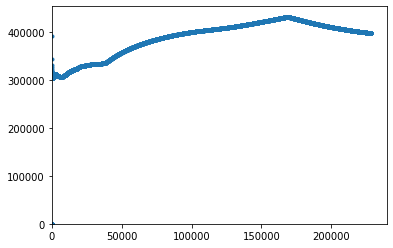

In [148]:
Bg_arr = np.array(Bg_arr)
F = GPT1 * Bg_arr # MMscf
Eg = Bg_arr - Bg_arr[0]
F_Eg = F / Eg

plt.plot(GPT1, F_Eg, '.')
plt.xlim(xmin=0); plt.ylim(ymin=0)